In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import numpy as np
from pynhd import NLDI
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.plot import reshape_as_image
import tomli
import xarray as xr

from landscape_processes.data_functions import get_aligned_input_rasters
from landscape_processes.raster_utils import load_raster_xr
from landscape_processes.terrain import derived_terrain_rasters
from landscape_processes.thresholds import compute_channelization_raster
from landscape_processes.thresholds import compute_landsliding_raster
from landscape_processes.thresholds import compute_saturated_raster
from landscape_processes.thresholds import unconditionally_stable
from landscape_processes.thresholds import unconditionally_unstable

In [2]:
geom_crs = "EPSG:4326"
crs = "EPSG:5070"

basin = NLDI().get_basins(feature_ids='11376550', fsource="ca_gages")
basin = basin.to_crs(geom_crs)
geom = basin.geometry[0]

In [3]:
dem, t, bd, p = get_aligned_input_rasters(geom, geom_crs=geom_crs, crs=crs, wet=False)

## Visualize the Input Rasters

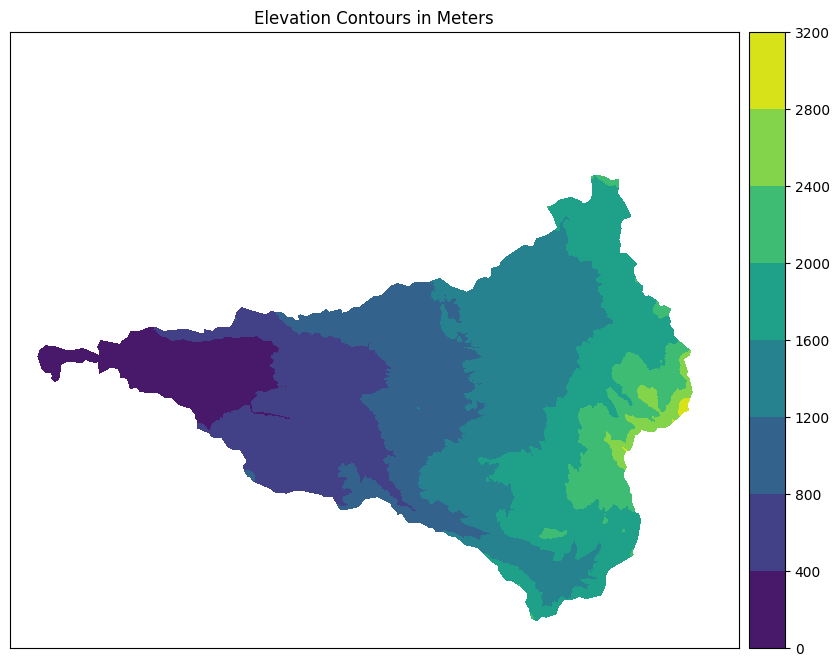

In [8]:
# DEM
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cs = ax.contourf(dem, origin="upper")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Elevation Contours in Meters")
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(cs, cax=cax, orientation="vertical")
plt.show()

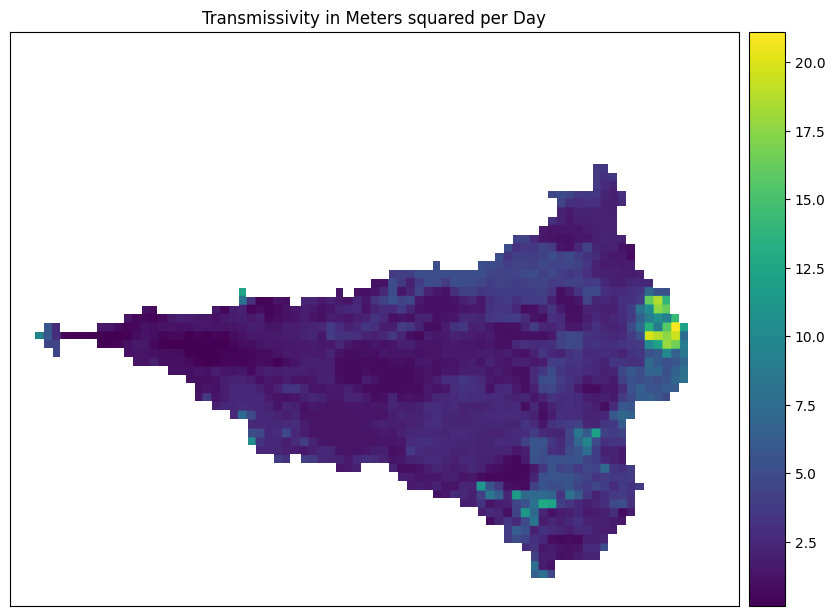

In [15]:
# Transmissivity
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)

cs = ax.imshow(t, origin="upper")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Transmissivity in Meters squared per Day")
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(cs, cax=cax, orientation="vertical")
plt.show()

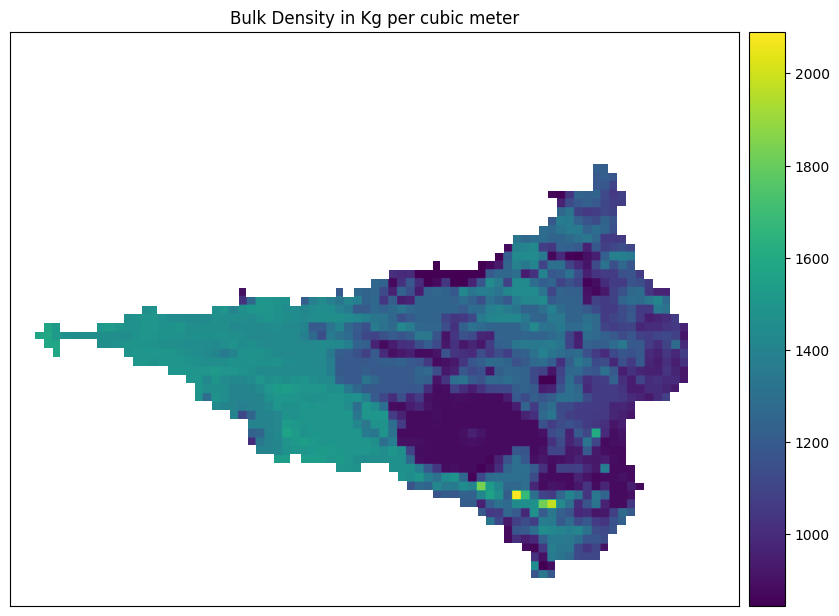

In [16]:
# Particle Bulk Density
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)

cs = ax.imshow(bd, origin="upper")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Bulk Density in Kg per cubic meter")
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(cs, cax=cax, orientation="vertical")
plt.show()

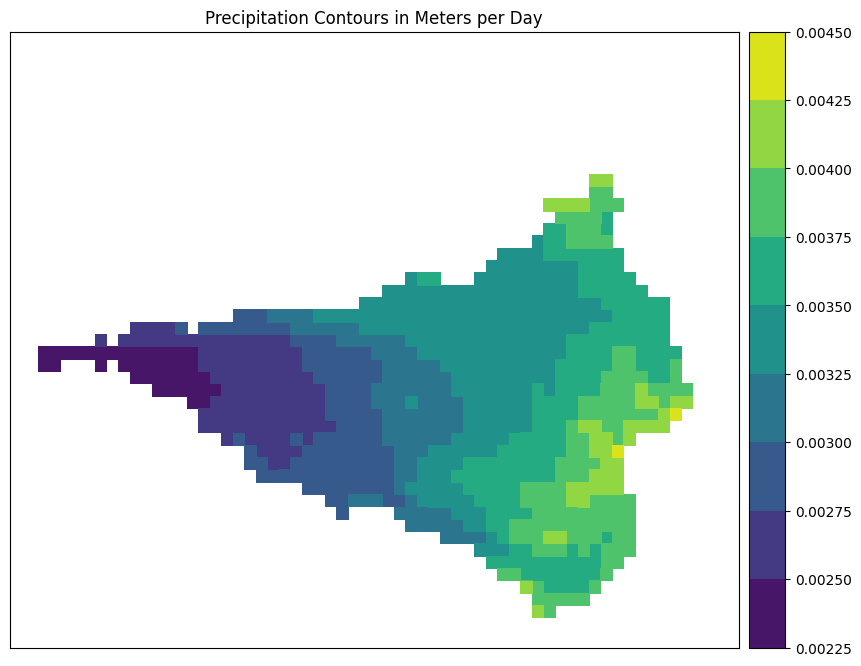

In [18]:
# Precipitation
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cs = ax.contourf(p, origin="upper")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Precipitation Contours in Meters per Day")
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(cs, cax=cax, orientation="vertical")
plt.show()